In [1]:
import numpy as np
import matplotlib.pyplot as plt

Procuramos a solução ($x>0$) da equação::

$$1.5 = e^x + \frac{0.45}{x}(e^x -1)$$ 

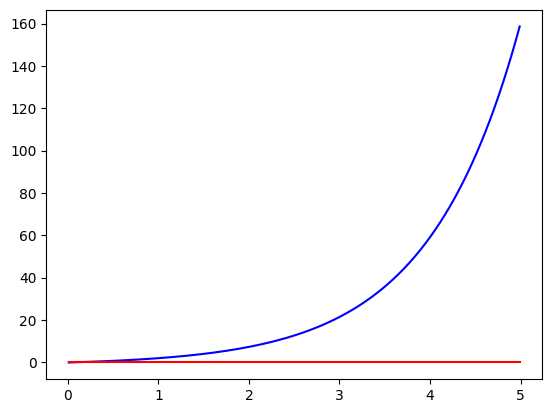

In [2]:
g=lambda x: -1.5+np.exp(x)+0.45/x*(np.exp(x)-1)
x=np.arange(0.01,5,0.01)
y=g(x)
z = np.zeros(len(x))
plt.plot(x,y,'b',x,z,'r');plt.show()

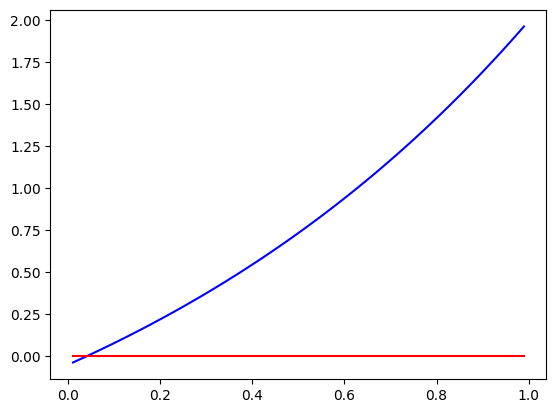

In [3]:
x=np.arange(0.01,1,0.01)
y=g(x)
z = np.zeros(len(x))
plt.plot(x,y,'b',x,z,'r');plt.show()

Não parece fácil resolver exatamente a equação, nem 'à mão' nem com o sympy...



# Definir uma função do Sympy que recebe como argumento  expressões com símbolos e que se pode, por exemplo, derivar 

In [4]:
import sympy as S
from sympy import Symbol
from sympy.solvers import solve
t = Symbol('t')
F = lambda t: -1.5 + S.exp(t)+0.45/t*(S.exp(t)-1)

## F é uma função do sympy recebe com argumento expressões com símbolos

In [5]:
F(t)

exp(t) - 1.5 + 0.45*(exp(t) - 1)/t

In [6]:
# Como é uma função do sympy pode-se calcular, por exemplo, derivada de F 
S.diff(F(t),t)

exp(t) + 0.45*exp(t)/t - 0.45*(exp(t) - 1)/t**2

## Como F é uma função que 'trabalha' com símbolos, não processa numericamente os seus argumentos

In [7]:
x=np.arange(0.1,1,0.1)
print(x)
y=F(x)
print(y)

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
[-1.5 + 4.5*(-1 + exp([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])) + exp([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
 -1.5 + 2.25*(-1 + exp([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])) + exp([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
 -1.5 + 1.5*(-1 + exp([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])) + exp([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
 -1.5 + 1.125*(-1 + exp([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])) + exp([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
 -1.5 + 0.9*(-1 + exp([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])) + exp([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
 -1.5 + 0.75*(-1 + exp([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])) + exp([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
 -1.5 + 0.642857142857143*(-1 + exp([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])) + exp([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
 -1.5 + 0.5625*(-1 + exp([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])) + exp([0.1

O valor numérico de F(x) não foi calculado apenas a sua expressão: não serve para fazer um gráfico, por exemplo.

Para obter uma função que 'faz sair' o valor numérico de um array numpy criamos uma outra função a partir de F 

/home/rui/.local/lib/python3.9/site-packages/sympy/core/evalf.py:892: SymPyDeprecationWarning: 

Using non-Expr arguments in Pow is deprecated (in this case, one of the
arguments is of type 'ImmutableDenseNDimArray').

If you really did intend to construct a power with this base, use the **
operator instead.

See https://docs.sympy.org/latest/explanation/active-deprecations.html#non-expr-args-deprecated
for details.

This has been deprecated since SymPy version 1.7. It
will be removed in a future version of SymPy.

  return evalf_pow(Pow(S.Exp1, expr.exp, evaluate=False), prec, options)


AttributeError: 'ImmutableDenseNDimArray' object has no attribute '_eval_evalf'

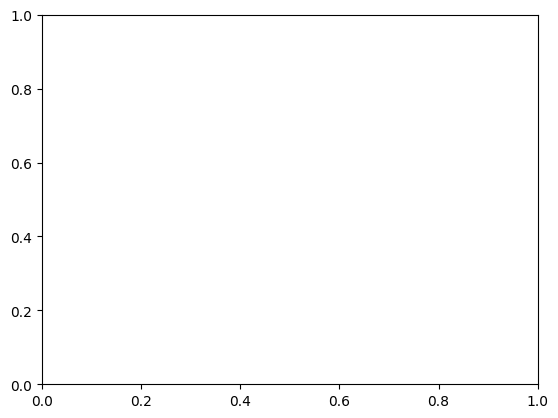

In [8]:
plt.plot(x,y)

# Criar, a partir da função, F, que trabalha com símbolos, uma função, f, com a mesma expressão de F, mas que processa numericamente os seus argumentos

In [9]:
f = S.lambdify(t,F(t))

In [10]:
y=f(x)
print(y)

[0.07844005 0.21955896 0.37464702 0.54512748 0.73257041 0.9387079
 1.16545088 1.4149077  1.68940467]


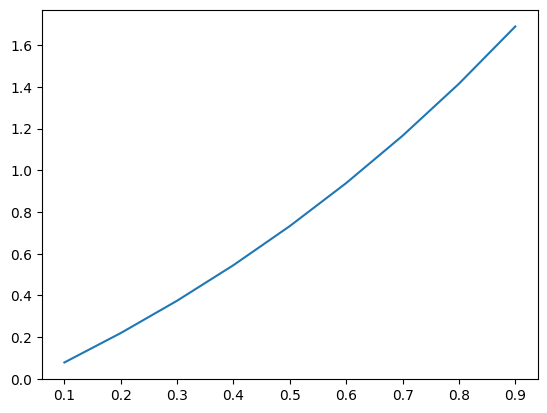

In [11]:
plt.plot(x,y)

In [12]:
S.solve(f(t),t,(0.01,5))

TypeError: loop of ufunc does not support argument 0 of type Symbol which has no callable exp method

## O sympy não conseguiu encontrar uma solução (exata) da equação

# Vamos introduzir, neste capítulo do programa, diversos métodos para obter uma solução aproximada da equação
